# COM S 474/574 Spring 2024
# 4.1 Linear Regression
## Gabriel Ferreira(gabferre@iastate.edu)
### - The Real Estate Dataset
- data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/
- a local copy is saved as "data/Real_estate.csv"

#### Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset

In [2]:
X = np.array([[0,0], [10,10], [100,100], [1,1], [0,5], [-3,4], [-1,1], [0,-10], [30,-4]])
X

array([[  0,   0],
       [ 10,  10],
       [100, 100],
       [  1,   1],
       [  0,   5],
       [ -3,   4],
       [ -1,   1],
       [  0, -10],
       [ 30,  -4]])

#### Initial State

In [3]:
clusters = {
    "C1": [[0,0], [10,10], [100,100]], 
    "C2": [[1,1], [0,5], [-3,4]],
    "C3": [[-1,1], [0,-10], [30,-4]]
}

centroid_C1 = np.mean(clusters["C1"], axis=0)
centroid_C2 = np.mean(clusters["C2"], axis=0)
centroid_C3 = np.mean(clusters["C3"], axis=0)

print(clusters)
print(centroid_C1)
print(centroid_C2)
print(centroid_C3)

{'C1': [[0, 0], [10, 10], [100, 100]], 'C2': [[1, 1], [0, 5], [-3, 4]], 'C3': [[-1, 1], [0, -10], [30, -4]]}
[36.66666667 36.66666667]
[-0.66666667  3.33333333]
[ 9.66666667 -4.33333333]


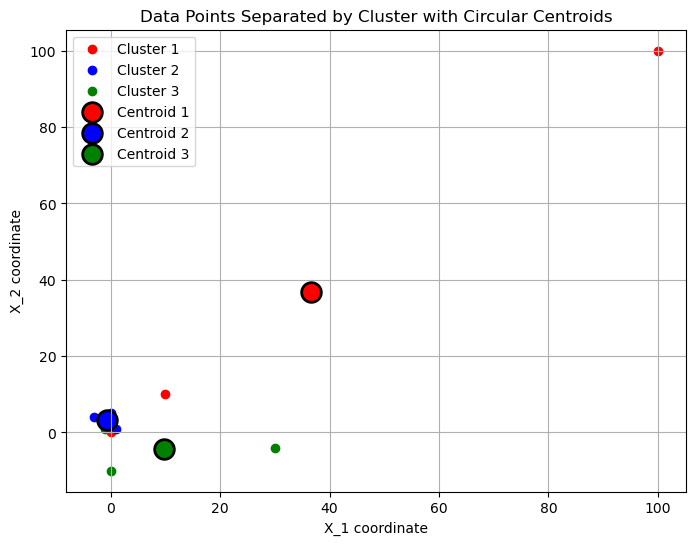

In [4]:
C1_points = np.array(clusters['C1'])
C2_points = np.array(clusters['C2'])
C3_points = np.array(clusters['C3'])

# Plotting the clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(C1_points[:, 0], C1_points[:, 1], color='red', label='Cluster 1')
plt.scatter(C2_points[:, 0], C2_points[:, 1], color='blue', label='Cluster 2')
plt.scatter(C3_points[:, 0], C3_points[:, 1], color='green', label='Cluster 3')

# Plotting the centroids with circle markers outlined in black
plt.scatter(centroid_C1[0], centroid_C1[1], color='red', marker='o', edgecolor='black', s=200, label='Centroid 1', linewidths=2)
plt.scatter(centroid_C2[0], centroid_C2[1], color='blue', marker='o', edgecolor='black', s=200, label='Centroid 2', linewidths=2)
plt.scatter(centroid_C3[0], centroid_C3[1], color='green', marker='o', edgecolor='black', s=200, label='Centroid 3', linewidths=2)

plt.title('Data Points Separated by Cluster with Circular Centroids')
plt.xlabel('X_1 coordinate')
plt.ylabel('X_2 coordinate')
plt.legend()
plt.grid(True)
plt.show()

#### b) What are your updated clusters after one step of iteration? Please explain your steps to derive your answer.

In [5]:
X

array([[  0,   0],
       [ 10,  10],
       [100, 100],
       [  1,   1],
       [  0,   5],
       [ -3,   4],
       [ -1,   1],
       [  0, -10],
       [ 30,  -4]])

In [6]:
print(centroid_C1)
print(centroid_C2)
print(centroid_C3)

[36.66666667 36.66666667]
[-0.66666667  3.33333333]
[ 9.66666667 -4.33333333]


In [7]:
# store data points with shorttest distance
updated_clusters = {
    "C1": [],
    "C2": [],
    "C3": []
}

# Loop through X
for xi in range(len(X)):
    
    # Euclidean distance 2nd form
    xi_c1_dist = np.sqrt((X[xi][0] - centroid_C1[0])**2 + (X[xi][1] - centroid_C1[1])**2)
    xi_c2_dist = np.sqrt((X[xi][0] - centroid_C2[0])**2 + (X[xi][1] - centroid_C2[1])**2)
    xi_c3_dist = np.sqrt((X[xi][0] - centroid_C3[0])**2 + (X[xi][1] - centroid_C3[1])**2)
    
    # Determine which centroid is closest
    min_dist = min(xi_c1_dist, xi_c2_dist, xi_c3_dist)
    print(min_dist)
    
    # Assign the point to the corresponding cluster
    if min_dist == xi_c1_dist:
        updated_clusters["C1"].append(X[xi].tolist())
    elif min_dist == xi_c2_dist:
        updated_clusters["C2"].append(X[xi].tolist())
    else:
        updated_clusters["C3"].append(X[xi].tolist())

# Updated cluster
print("")
print("Updated Clusters:")
updated_clusters

3.39934634239519
12.578641509408804
89.56685895029602
2.8674417556808756
1.795054935711501
2.42670329642684
2.3570226039551585
11.20515754264774
20.336065390226192

Updated Clusters:


{'C1': [[100, 100]],
 'C2': [[0, 0], [10, 10], [1, 1], [0, 5], [-3, 4], [-1, 1]],
 'C3': [[0, -10], [30, -4]]}

In [8]:
updated_centroid_C1 = np.mean(updated_clusters["C1"], axis=0)
updated_centroid_C2 = np.mean(updated_clusters["C2"], axis=0)
updated_centroid_C3 = np.mean(updated_clusters["C3"], axis=0)

print(updated_centroid_C1)
print(updated_centroid_C2)
print(updated_centroid_C3)

[100. 100.]
[1.16666667 3.5       ]
[15. -7.]


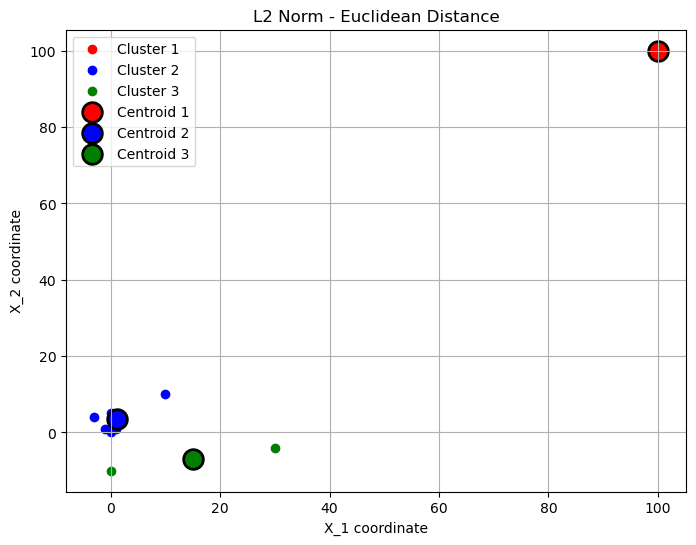

In [9]:
C1_points_updated = np.array(updated_clusters['C1'])
C2_points_updated = np.array(updated_clusters['C2'])
C3_points_updated = np.array(updated_clusters['C3'])

# Plotting the clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(C1_points_updated[:, 0], C1_points_updated[:, 1], color='red', label='Cluster 1')
plt.scatter(C2_points_updated[:, 0], C2_points_updated[:, 1], color='blue', label='Cluster 2')
plt.scatter(C3_points_updated[:, 0], C3_points_updated[:, 1], color='green', label='Cluster 3')

# Plotting the centroids with circle markers outlined in black
plt.scatter(updated_centroid_C1[0], updated_centroid_C1[1], color='red', marker='o', edgecolor='black', s=200, label='Centroid 1', linewidths=2)
plt.scatter(updated_centroid_C2[0], updated_centroid_C2[1], color='blue', marker='o', edgecolor='black', s=200, label='Centroid 2', linewidths=2)
plt.scatter(updated_centroid_C3[0], updated_centroid_C3[1], color='green', marker='o', edgecolor='black', s=200, label='Centroid 3', linewidths=2)

plt.title('L2 Norm - Euclidean Distance')
plt.xlabel('X_1 coordinate')
plt.ylabel('X_2 coordinate')
plt.legend()
plt.grid(True)
plt.show()

#### c) Consider using $l1-norm$ as the distance (cost) measure.

In [10]:
# store data points with shorttest distance
updated_clusters = {
    "C1": [],
    "C2": [],
    "C3": []
}

# Loop through X
for xi in range(len(X)):
    
    # Manhattan distance 1st form
    xi_c1_dist = np.abs(X[xi][0] - centroid_C1[0]) + abs(X[xi][1] - centroid_C1[1])
    xi_c2_dist = np.abs(X[xi][0] - centroid_C2[0]) + abs(X[xi][1] - centroid_C2[1])
    xi_c3_dist = np.abs(X[xi][0] - centroid_C3[0]) + abs(X[xi][1] - centroid_C3[1])
    
    # Determine which centroid is closest
    min_dist = min(xi_c1_dist, xi_c2_dist, xi_c3_dist)
    print(xi_c1_dist, "|", xi_c2_dist, "|", xi_c3_dist)
    
    # Assign the point to the corresponding cluster
    if min_dist == xi_c1_dist:
        updated_clusters["C1"].append(X[xi].tolist())
    elif min_dist == xi_c2_dist:
        updated_clusters["C2"].append(X[xi].tolist())
    else:
        updated_clusters["C3"].append(X[xi].tolist())

# Updated cluster
print("")
print("Updated Clusters:")
updated_clusters

73.33333333333333 | 4.0 | 14.0
53.33333333333333 | 17.333333333333332 | 14.666666666666666
126.66666666666667 | 197.33333333333334 | 194.66666666666666
71.33333333333333 | 4.0 | 14.0
68.33333333333333 | 2.333333333333333 | 19.0
72.33333333333333 | 3.0 | 21.0
73.33333333333333 | 2.666666666666667 | 16.0
83.33333333333333 | 14.0 | 15.333333333333332
47.33333333333333 | 38.0 | 20.666666666666668

Updated Clusters:


{'C1': [[100, 100]],
 'C2': [[0, 0], [1, 1], [0, 5], [-3, 4], [-1, 1], [0, -10]],
 'C3': [[10, 10], [30, -4]]}

In [11]:
updated_centroid_C1 = np.mean(updated_clusters["C1"], axis=0)
updated_centroid_C2 = np.mean(updated_clusters["C2"], axis=0)
updated_centroid_C3 = np.mean(updated_clusters["C3"], axis=0)

print(updated_centroid_C1)
print(updated_centroid_C2)
print(updated_centroid_C3)

[100. 100.]
[-0.5         0.16666667]
[20.  3.]


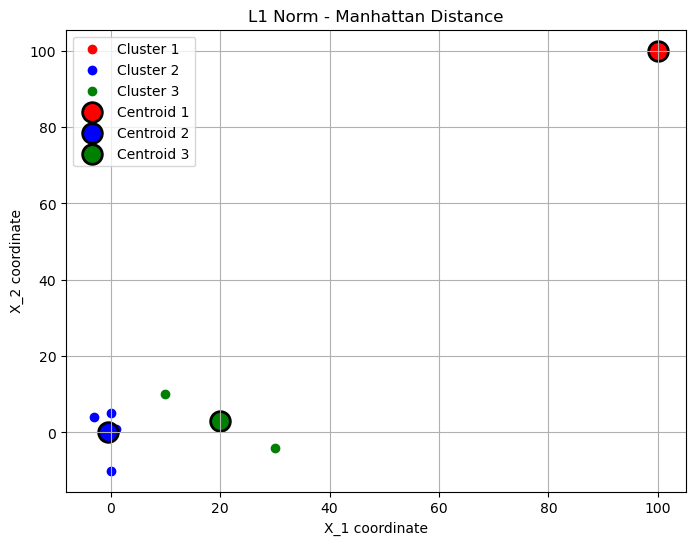

In [12]:
C1_points_updated = np.array(updated_clusters['C1'])
C2_points_updated = np.array(updated_clusters['C2'])
C3_points_updated = np.array(updated_clusters['C3'])

# Plotting the clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(C1_points_updated[:, 0], C1_points_updated[:, 1], color='red', label='Cluster 1')
plt.scatter(C2_points_updated[:, 0], C2_points_updated[:, 1], color='blue', label='Cluster 2')
plt.scatter(C3_points_updated[:, 0], C3_points_updated[:, 1], color='green', label='Cluster 3')

# Plotting the centroids with circle markers outlined in black
plt.scatter(updated_centroid_C1[0], updated_centroid_C1[1], color='red', marker='o', edgecolor='black', s=200, label='Centroid 1', linewidths=2)
plt.scatter(updated_centroid_C2[0], updated_centroid_C2[1], color='blue', marker='o', edgecolor='black', s=200, label='Centroid 2', linewidths=2)
plt.scatter(updated_centroid_C3[0], updated_centroid_C3[1], color='green', marker='o', edgecolor='black', s=200, label='Centroid 3', linewidths=2)

plt.title('L1 Norm - Manhattan Distance')
plt.xlabel('X_1 coordinate')
plt.ylabel('X_2 coordinate')
plt.legend()
plt.grid(True)
plt.show()

#### d) Use sklearn.cluster.KMeans to cluster the data set of the above 9 points. Set K = 2 (two clusters). Plot your clustered outcome (use different colors to differentiate the clusters).


In [13]:
from sklearn.cluster import KMeans

# KMeans with K = 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Predicted cluster labels for each point
labels = kmeans.labels_

# Calculated centroids
centroids = kmeans.cluster_centers_


print(labels)
print(centroids)

[0 0 1 0 0 0 0 0 0]
[[  4.625   0.875]
 [100.    100.   ]]


/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
centroids[1][1]

100.0

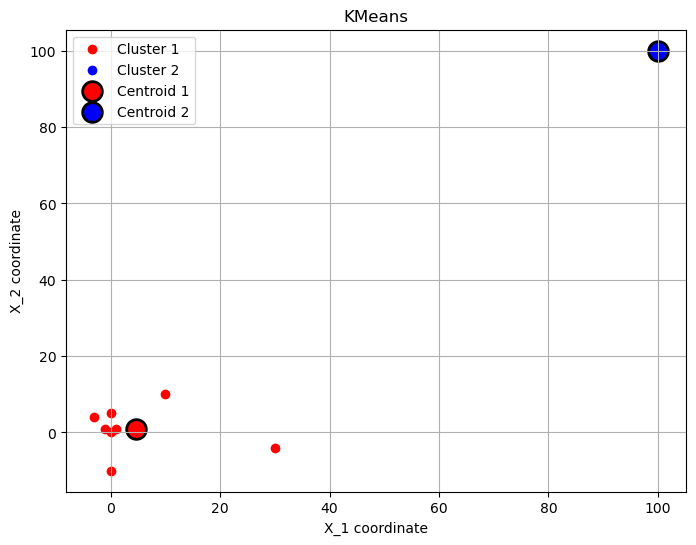

In [15]:
# Extracting points for each cluster based on KMeans labels
C1_kmeans_points = X[labels == 0]
C2_kmeans_points = X[labels == 1]

# Plotting the clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(C1_kmeans_points[:, 0], C1_kmeans_points[:, 1], color='red', label='Cluster 1')
plt.scatter(C2_kmeans_points[:, 0], C2_kmeans_points[:, 1], color='blue', label='Cluster 2')

# Plotting the centroids with circle markers outlined in black
plt.scatter(centroids[0][0], centroids[0][1], color='red', marker='o', edgecolor='black', s=200, label='Centroid 1', linewidths=2)
plt.scatter(centroids[1][0], centroids[1][1], color='blue', marker='o', edgecolor='black', s=200, label='Centroid 2', linewidths=2)

plt.title('KMeans')
plt.xlabel('X_1 coordinate')
plt.ylabel('X_2 coordinate')
plt.legend()
plt.grid(True)
plt.show()

#### 4. $yi \in \{1, -1\},\forall i, X = \{(0, 2), (0.4, 1), (0.6, 1), (1, 0)\}, y = \{-1, -1, 1, 1\}

In [16]:
X = np.array([[0, 2], [0.4, 1], [0.6, 1], [1, 0]])
y = np.array([-1, -1, 1, 1])
w = np.array([1, -1])
b = .5

y_pred = np.dot(X, w) + b
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred

array([-1, -1,  1,  1])

In [17]:
# np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100) 

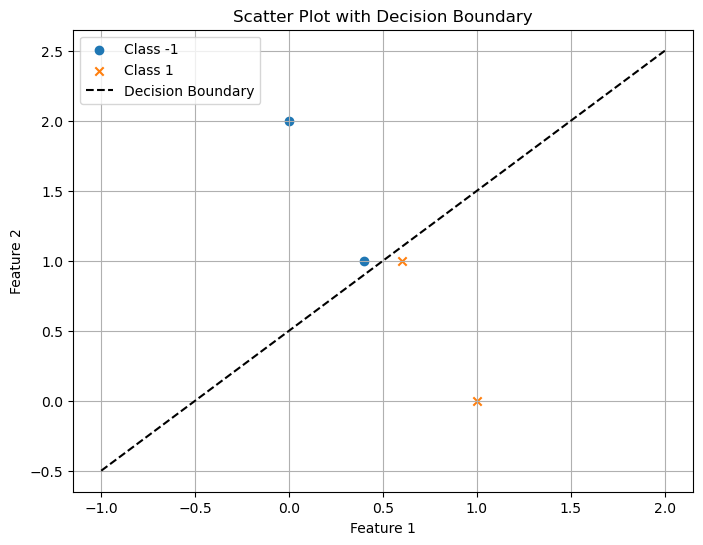

In [18]:
#### Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred == -1, 0], X[y == -1, 1], label='Class -1', marker='o')
plt.scatter(X[y_pred == 1, 0], X[y == 1, 1], label='Class 1', marker='x')

# Decision boundary: x2 = x1 + 0.5
x_1= np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
x_2 = x_1 + 0.5 

# Plotting the decision boundary
plt.plot(x_1, x_2, 'k--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

#### b)Compute the distance of the closest sample to the classifier boundary. Show me your equation and the sample(s) that are the closest.

In [19]:
distances = []
for xi in range(len(X)):
    
    xi_bound_dist = np.abs(np.dot(w.T, X[xi]) + .5) / np.sqrt(1**2 + (-1)**2)
    distances.append(xi_bound_dist)
    print(xi_bound_dist, X[xi])

1.0606601717798212 [0. 2.]
0.07071067811865474 [0.4 1. ]
0.07071067811865474 [0.6 1. ]
1.0606601717798212 [1. 0.]


In [20]:
print(np.min(distances))

0.07071067811865474


#### c) Scale your classifier so that yi(b + wT xi) = 1 for the closest sample(s) i and report the new b and w. Is 1 the same with the minimum distance from question 4(b)?

In [21]:
X = np.array([[0, 2], [0.4, 1], [0.6, 1], [1, 0]])
y = np.array([-1, -1, 1, 1])
w = np.array([10, -10])
b = 5

y_pred = np.dot(X, w) + b
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred

array([-1, -1,  1,  1])

#### 5. Create a data set yourself with X ⊂ Rn and the classified labels y ∈ {−1, 1}.

In [36]:
X = np.array([[0, 0],
     [0.936, 2.376],
     [1.829, 1.496],
     [0.390, 0.389],
     [0.145, 2.165],
     [1.502, 1.770],
     [2.551, 4.924],
     [4.588, 3.030],
     [2.954, 2.958],
     [3.260, 3.811],
     [3.579, 3.228],
     [10.577, 8.228]])

y = np.array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, 1])

#### (a) Give the scatter plot of the data you created, use colors to differentiate the different labels.

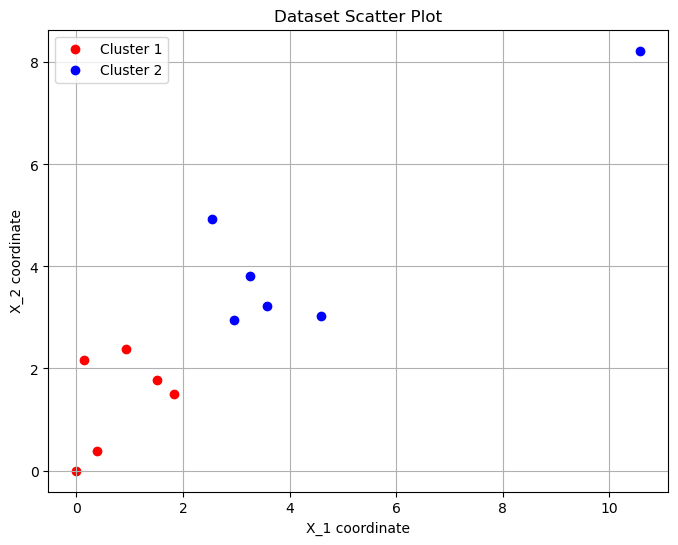

In [43]:
##### Extracting points for each cluster based on KMeans labels
C1_points = X[y == -1]
C2_points = X[y == 1]

# Plotting the clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(C1_points[:, 0], C1_points[:, 1], color='red', label='Cluster 1')
plt.scatter(C2_points[:, 0], C2_points[:, 1], color='blue', label='Cluster 2')

plt.title('Dataset Scatter Plot')
plt.xlabel('X_1 coordinate')
plt.ylabel('X_2 coordinate')
plt.legend()
plt.grid(True)
plt.show()

#### Use the SVC tools from sklearn to create a linear classifier for your data set and show it on the plot (note sklearn has at least two ways to implement a linear SVC: svm.LinearSVC and svm.SVC with the argument kernel set to “linear", svm.LinearSVC is generally faster).

In [38]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svc_model = SVC(kernel='linear').fit(X, y)
y_pred = svc_model.predict(X)


# Get coefficients and intercept for SVC
w1_svc, w2_svc = svc_model.coef_[0]
b_svc = svc_model.intercept_[0]
x_1_sv = svc_model.support_vectors_[:, 0]
x_2_sv = svc_model.support_vectors_[:, 1]

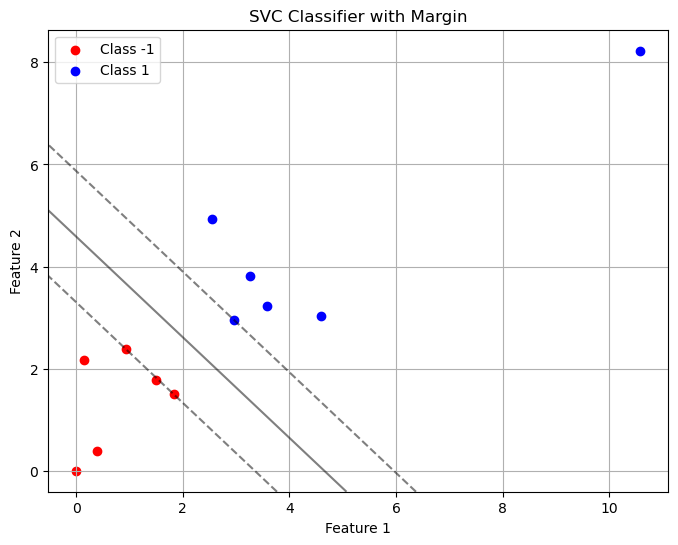

In [39]:
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred == -1][:, 0], X[y_pred == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], color='blue', label='Class 1')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC Classifier with Margin')
plt.legend()
plt.grid(True)
plt.show()

#### (c) Recall the logistic regression introduced in the previous lecture, use sklearn.linear_model.LogisticRegression to create another linear classifier for your data set. Show it on the plot, and compare it with the SVC-based solution.

In [40]:
from sklearn.linear_model import LogisticRegression

# train model
logistic_model = LogisticRegression(random_state=0).fit(X, y)
y_pred = logistic_model.predict(X)

# Get coefficients and intercept for logistic regression
w1_log, w2_log = logistic_model.coef_[0]
b_log = logistic_model.intercept_[0]

y_pred

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

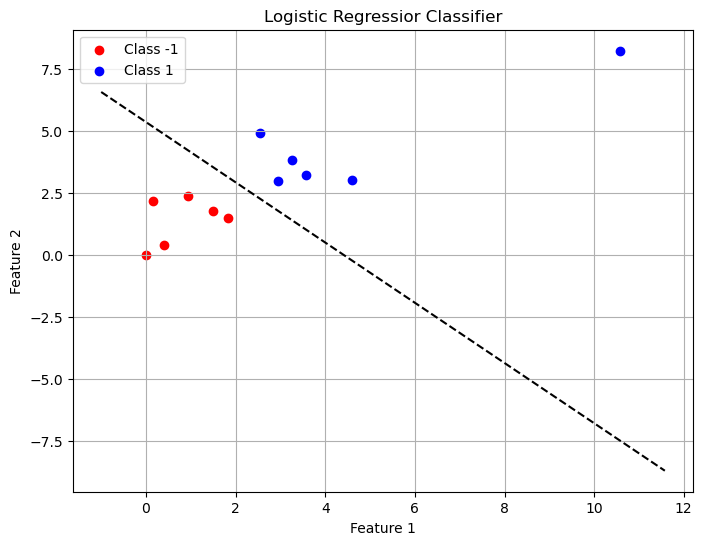

In [44]:
##### Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred == -1, 0], X[y == -1, 1], color = 'red', label='Class -1', marker='o')
plt.scatter(X[y_pred == 1, 0], X[y == 1, 1], color = 'blue', label='Class 1', marker='o')

# Decision boundary: solve for x2 in terms of x1
x_1 = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 100)
x_2 = -(w1_log / w2_log) * x_1 - (b_log / w2_log)

# Plotting the decision boundary
plt.plot(x_1, x_2, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regressior Classifier')
plt.legend()
plt.grid(True)
plt.show()

#### SVC Vs. Logistic Regression

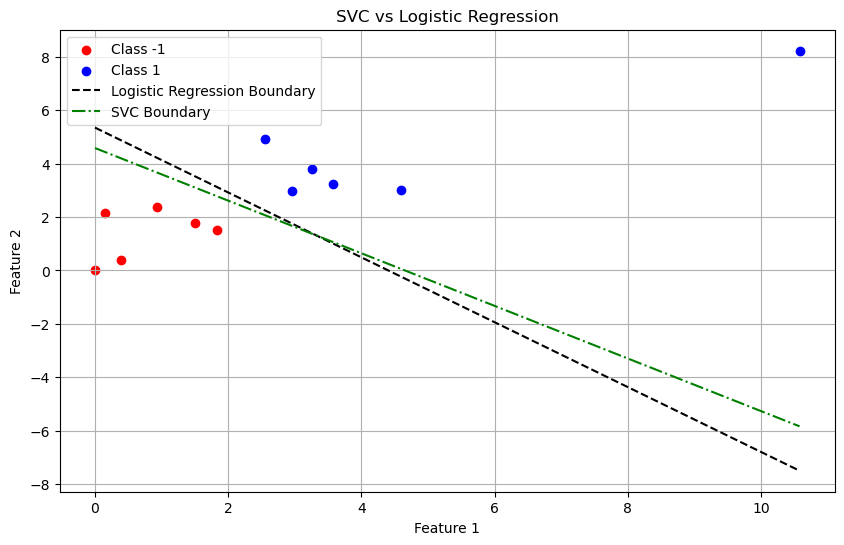

In [42]:
# Calculate decision boundary for logistic regression
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_log = -(w1_log / w2_log) * x_vals - (b_log / w2_log)

# Calculate decision boundary for SVC
y_vals_svc = -(w1_svc / w2_svc) * x_vals - (b_svc / w2_svc)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_vals, y_vals_log, 'k--', label='Logistic Regression Boundary')
plt.plot(x_vals, y_vals_svc, 'g-.', label='SVC Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC vs Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


From the above image, we can see the Logistic Regression is likely to be influenced by all data points, including outliers, which could skew its decision boundary if outliers are present. In contrast, SVC focuses on the support vectors closest to the decision boundary and is generally more robust to outliers.